# Final Project
## Kevin Li
## Prithvi Narasimhan
## Rajiv Pasricha
## Andy Zhang
## Matthew Ho

## Introduction and Background

Crime is unfortunately a prevalent occurrence in Chicago. With a crime index of 11, Chicago is considered to be more dangerous than 89% of the cities in the United States. Per 1,000 residents, Chicago has a violence-related crime rate of 9.08 and property-related crime rate of 30.15 (https://www.neighborhoodscout.com/il/chicago/crime). Since we believe that the quality of living standards are directly related to the socioeconomic statuses and crime rate of the communities within Chicago as a whole, we wanted to see if the quality of certain facilities in Chicago correlated with the crime rate present in the area of those facilities. We decided that we wanted to look more closely at food-centered facilities, largely restaurants located in the city of Chicago.
 
In Chicago alone, there are more than 7,300 restaurants among 77 communities containing more than 100 neighborhoods within a city area of 234 square miles. (https://www.cityofchicago.org/city/en/about/facts.html) Because Chicago is such a large city with so many communities in it, we believed that getting data for it would be fine-grained and that there would be a good deal of data that would give us a fine-grained overview of information regarding the communities within Chicago.
 
Since people of lower socioeconomic status tend to have lower accessibility to higher quality and nutritious foods (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4231366/), we wanted to extend this idea to whether people would be able to have access to good quality food in restaurants. To narrow down the scale of analysis, we decided to choose Chicago for our analysis, as it is a varied city, such as there are parts in which crime is higher than other parts.

In [1]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of decimal places to round latitude / longitude
num_decimal_places = 2

## Datasets

### Yelp data

Although restaurant health data would be a good indicator on the overall safety of eating at a restaurant, a safety inspection alone cannot quantify the perceived quality of a restaurant to a real consumer. When considering this problem, we decided to use reviews from Yelp, a public website which crowdsources restaurant reviews from millions of users in a social network, as a method to quantitatively determine the “value” of a particular restaurant, from the perspective of the local community. Although Yelp provides public data on restaurant reviews, the company does not provide Chicago-related data in an easily digestible CSV or JSON file. Ultimately, since our project is focused on trend within the Chicago area, our team indirectly used data collected through Yelp’s open API. On the GitHub repository titled “jpvelez/restaurant_inspection_analysis”, the repository author provided a JSON formatted file, containing review data and location information for 2800 restaurants, all of which were ingested through Yelp’s open API (the file can be found here: https://github.com/jpvelez/restaurant_inspection_analysis/blob/master/data/yelp_restaurants_0-2800.json). 
 
The Yelp data set consists of a list of restaurants in Chicago that have Yelp reviews, each of which has hundreds of attributes although we only care about a few. In terms of the most relevant data to this project, each restaurant has a location (latitude / longitude). The latitude and longitude data could be used in conjunction with other data sets, in order to determine a general location area for a given restaurant (see section on neighborhoods). Such a location area would enable us to better identify trends between various areas of the city. In addition, the Yelp dataset provides information on the number of reviews. We hypothesize that the number of reviews could be a clear indication on the foot traffic to a restaurant. This is based off the assumption that, across a subsection of the population, people from all demographic groups use Yelp as a platform for reviews, with similar frequency. Moreover, the number of reviews could be a clear indication on the quality of a given Yelp rating, since additionally reviews clearly translate to more data going into the numeric Yelp rating. In addition, the data contains a Yelp rating. This Yelp rating is a quantitative representation of a community’s perception of a given restaurant. We hypothesize that this information will tend to closely correlate with restaurant health data, and therefore can be used as a secondary metric to identify trends between restaurant quality and crime. At the same time, as previously discussed, the review rating could be skewed by the nature of the Yelp user base (based on income demographics).

In [2]:
df_yelp = pd.read_csv('2646.csv').dropna()

### Restaurant health data

In addition to Yelp reviews, we hypothesized that restaurant health data would be a clear, secondary data source. The restaurant health data can be found at https://query.data.world/s/6z85omejrs5j4guql6w73zqr. We hypothesize that there will be a correlation between the restaurant health data and crime. Specifically, we believe that areas with higher crimes, which might translate into less overall per capita wealth, would correlate to more restaurants failing their health ratings. As in the case of the Yelp data, the tuples of latitude and longitude for each entry will help us, when doing data cleansing, determine the neighborhood of a particular restaurant. The neighborhood metric would be more relevant than a latitude and longitude, since neighborhoods are social groups of areas based on similar demographics. In addition, the data contains, for each restaurant, a facility type, including restaurants, grocery stores, hospitals, and other venues that are subject to inspection. In our particular case, we hypothesize that the correlations will center around restaurants, grocery stores, and centers of care (examples include day cares). Moreover, we are provided with a 3-level risk assessment of a restaurant. 
 
We hypothesize that this information could help discover trends between crime data and the overall quality of a restaurant, from the perspective of a safety inspector. It is important to note that, in this specific case, a restaurant with a “HIGH” risk, could in fact, pass the inspection, although this is not necessarily the case. Therefore, the lack of granularity in this particular field, and the lack of clear metrics on what a level might mean, could possibly be a cause for concern. Moreover, we are given the inspection result, a binary value identifying if a restaurant passed or failed. This data could help us determine, using the solid metric of whether or not a restaurant is sanitary enough to produce food for human consumption, to identify trends between crime and restaurant quality. In addition, we are given data on the inspection data, which would help us get an idea about the seasonality of particular restaurant trends. One hypothesis is that there is a correlation between restaurant quality and time of the year, since restaurants, as we hypothesize, might vary in safety during busy seasons especially when there are many tourists, when compared to the relatively low traffic seasons. This would provide possibly relevant insight when compared to the crimes that occur within a certain season, although this metric might be biased, since restaurant inspections do not seem to follow a specific seasonal pattern, and a bad restaurant in winter, might just be an overall bad restaurant.

In [3]:
# Read the food-safety data
df_food = pd.read_csv('Food_Inspections_-_Map.csv').dropna()

### Crime data

The crime data is comprised of three different data sets, each representing the crimes in Chicago for three different years. The datasets can be accessed through the links here:(https://query.data.world/s/1dqli2sw6l2a1pk3xgrgxcz6s, https://query.data.world/s/8yjl03dp8xtu2kbcj86r8gb3x, https://query.data.world/s/ddg3u1rd1kedlmzz2j6k00pm8). As with the food-related data sets, the crime data set contains a latitude and longitude. As previously mentioned, this latitude and longitude data could be used in order to determine the neighborhood in which a crime has taken place. Additionally, the data set provides a description on the type of crime that has occurred. We hypothesize that understanding the crime type will allow us to identify trends between certain crime types. Moreover, we are provided with the data of the crime. We hypothesize that data information could be used to identify trends based on seasonality / time of year, and when combined with demographic data from the census data set, this data could provide us with insights on how different demographics interact with restaurants, and identify trends correlated with these metrics and crime. Moreover, we are also provided information on the location description. In other words, the data set describes the environment in which a given crime occurred (such as apartment or bar/tavern). We hypothesize that the crime location will correlate with food safety and food reviews, since crimes that occur outside, could possibly lead to a sharper decline in restaurant reviews, compared to crimes that occur within an apartment. Overall, when combined with the food datasets, we hypothesize that the crime data set will allow us to identify trends between food quality / food quality perception / food safety and the different types of crime that tend to occur within Chicago communities. Since Chicago is notorious for crime, we hypothesize that Chicago, in particular, would provide us with more granular data on how crime could impact the culture of a neighborhood. In this particular data analysis, we are using restaurants, places of community gathering, as a proxy for culture.

In [4]:
df_crime1 = pd.read_csv('chicago_crime_2014.csv')
df_crime2 = pd.read_csv('chicago_crime_2015.csv')
df_crime3 = pd.read_csv('chicago_crime_2016.csv')

# Combine 3 years of crime data
df_crime = pd.concat([df_crime1, df_crime2, df_crime3]).dropna()

### Census data

In addition to the restaurant and crime data, we are using census data, from the United States official census. We hypothesize that the census data will help us identify more granular statistics, based on the broad data extracted from the crime and food statistics.  The census data is grouped by neighborhood, a grouping that, we hypothesize, will allow us to identify trends more effectively. In addition, the census data provides demographic information regarding each neighborhood. For each row, we are given a population. We hypothesize that this population information will allow us to normalize the food and crime data on a per capita basis. Without such normalization, it is likely that high population neighborhoods, which , given a baseline rate of crime, would have higher crime rate, and the data normalization would allow us to take into account any possible population-based data skewing. The census also provides information on home occupancy and the average household size, both of which, we hypothesize, might provide insights into the quality and type of food available , along with the amount of crime. This is because, we hypothesize that vacant households might be a sign of a bad economy, and more crime. Moreover, we hypothesize that a household size could be an indicator for population density, which we believe would provide us with other insights. Additionally, the census data provides us with a median age for each neighborhood. We hypothesize that the median age will allow us to make inferences based on food quality (young people tend to, as we hypothesize, have less spending power) and on crime, since, age, we hypothesize, could have a correlation with crime level, and therefore, might be a factor that we need to normalize for when doing our data analysis. The census data also provides information demographic breakdowns of a given neighborhood. The census data’s information on the population of a given neighborhood for a demographic x, although due to the limited sample size in some census districts for certain demographics, we decided to not analyze the granular demographic data provided.  It is important to note, that the census data is from 2010, while the crime/food  data that we are utilizing for this project is from 2014. Therefore, there might be some inconsistencies due to demographic / neighborhood changes. Here is a https://datahub.cmap.illinois.gov/dataset/5700ba1a-b173-4391-a26e-48b198e830c8/resource/b30b47bf-bb0d-46b6-853b-47270fb7f626/download/CCASF12010CMAP.xlsx.

In [5]:
df_census = pd.read_excel('CCASF12010CMAP.xlsx')

## Data Cleaning / Pre-processing

For each data set associated with crime, restaurant health data and Yelp data, we pre-process the data, using a separate open source library, in order to identify the neighborhoods that a given location (latitude, longitude) is in. We noticed that all the datasets that we plan to use for our analysis contain latitude and longitude. Based off this observation, we hypothesized that it would be useful to identify the cultural boundaries of Chicago. In other words, we wanted to determine the neighborhood associated with a given latitude or longitude. We used a forked version of the open source Github repo craigmbooth/chicago_neighborhood_finder. This repo uses census data on neighborhood boundaries and given a CSV with latitude and longitude columns, it determines the neighborhood associated with the given location. In our fork, available at on Github at “kevinjli/chicago_neighborhood_finder”, we edited the source code so that the library outputs the neighborhood information into a CSV, as opposed to a JSON object. Although we do not run this library in our iPython notebook, before the notebook runs, the data set files inputted have been pre-processed with this library. 

For the Yelp data, we round the latitude and longitude in order to get "buckets" of nearby coordinates.

In [6]:
# Save the raw values for future use
df_yelp_unrounded = df_yelp.copy()

df_yelp['Latitude'] = df_yelp['Latitude'].round(num_decimal_places)
df_yelp['Longitude'] = df_yelp['Longitude'].round(num_decimal_places)

# A consistent string to represent the location bucket
df_yelp['Location'] = df_yelp['Latitude'].astype(str) + ',' + df_yelp['Longitude'].astype(str)

For food safety, we only want to consider inspections in 2014-2016 because those are the years for which we have crime data.

In [7]:
df_food['Inspection Date'] = pd.to_datetime(df_food['Inspection Date'])
df_food = df_food[(df_food['Inspection Date'] >= '2014-01-01') & (df_food['Inspection Date'] <= '2016-12-31')]

We drop columns we won't be using, and convert the risk and results columns into a more machine-usable format.

In [8]:
df_food = df_food.drop(['DBA Name', 'AKA Name', 'License #', 'State', 'City', 'Zip', 'Violations', 'Location', 'Address', 'Unnamed: 0'], axis=1)

# Stringify "Risk" column
df_food['Risk'] = df_food['Risk'].apply(lambda x: x.split(' ')[2][1:-1])

# Intify "Results" column
df_food['Results'] = df_food['Results'].apply(lambda x: int(x == 'Pass'))

Again we round the latitude and longitude in order to bucket.

In [9]:
# Save the raw values for future use
df_food_unrounded = df_food.copy()

df_food['Latitude'] = df_food['Latitude'].round(num_decimal_places)
df_food['Longitude'] = df_food['Longitude'].round(num_decimal_places)

# A consistent string to represent the location bucket
df_food['Location'] = df_food['Latitude'].astype(str) + ',' + df_food['Longitude'].astype(str)

For the crime data, again drop columns we won't be using.

In [10]:
# Save the raw values for future use
df_crime_unrounded = df_crime.copy()

# Remove irrelevant columns
df_crime = df_crime.drop(['Block', 'ID', 'Case Number', 'Domestic', 'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'IUCR', 'Description', 'District'], axis=1)

We also remove any crimes that occurred outside of Chicago, which for some reason appeared in the raw data.

In [11]:
df_crime = df_crime[(df_crime['Latitude'] > 41) &
                    (df_crime['Latitude'] < 43) &
                    (df_crime['Longitude'] > -88) &
                    (df_crime['Longitude'] < -87)]

Again we round the latitude and longitude in order to bucket.

In [12]:
df_crime['Latitude'] = df_crime['Latitude'].round(num_decimal_places)
df_crime['Longitude'] = df_crime['Longitude'].round(num_decimal_places)

# A consistent string to represent the location bucket
df_crime['Location'] = df_crime['Latitude'].astype(str) + ',' + df_crime['Longitude'].astype(str)

For the census data, we need to remove the very top row which contains the English descriptions of each column. We then need to apply our own English descriptions to replace the encoded column names.

In [13]:
# Remove the first row of English descriptions
df_census = df_census.iloc[1:]

# Rename the columns we will use
df_census['Neighborhood'] = df_census['GEOGNAME']
df_census['Total Population'] = df_census['P0050001']
df_census['Average Age'] = df_census['P0130001']
df_census['Average Household Size'] = df_census['P0170001']
df_census['Percent Housing Occupied'] = ( df_census['H0030002'].astype(int) / df_census['H0030001'].astype(int) ) * 100;

# Remove all other columns
df_census = df_census[['Neighborhood','Total Population', 'Average Age', 'Average Household Size', 'Percent Housing Occupied']]

## Data Visualization
First, we decided to visualize the collected crime data by simply plotting all of the observed crime locations. Interestingly, when making the specific points for the observed crimes smaller, simply plotting the latitude and longitude values results in a detailed map of the City of Chicago. This map is able to encompass the overall street layout of the city, and also shows where most of the crimes are concentrated in Chicago. We see that the crimes are more heavily concentrated in the downtown region and the frequency decreases as the distance from the city center increases. On the outskirts of the city, corresponding to more suburban regions, the dots are much more sparse, corresponding to a lower frequency and density of crimes.

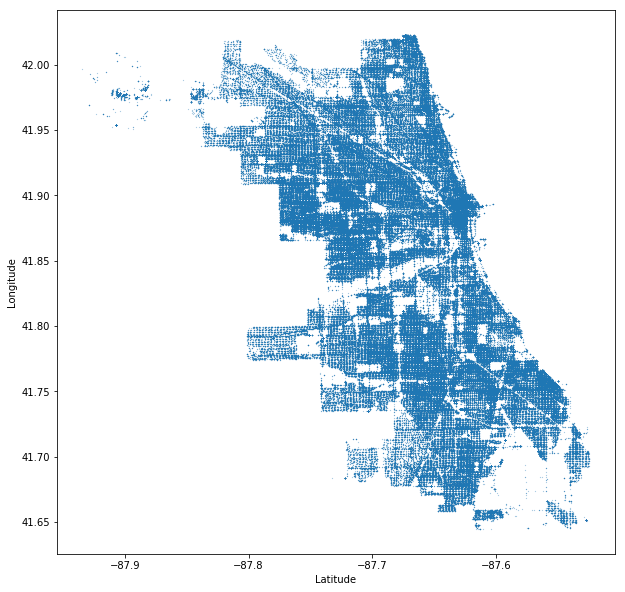

In [14]:
# Scatter plot of where observed crimes occur in Chicago
plt.figure(figsize=(10, 10))
plt.scatter(df_crime_unrounded['Longitude'], df_crime_unrounded['Latitude'], s=0.02)

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

Next, we plot the same scatter plot as above, by plotting the latitude and longitude of observed crimes in Chicago. However, in this plot, we color the data points by the "District" column, reported by the City of Chicago. The main purpose of this and the following plots is to explore the boundaries of the reported regions associated with each crime.

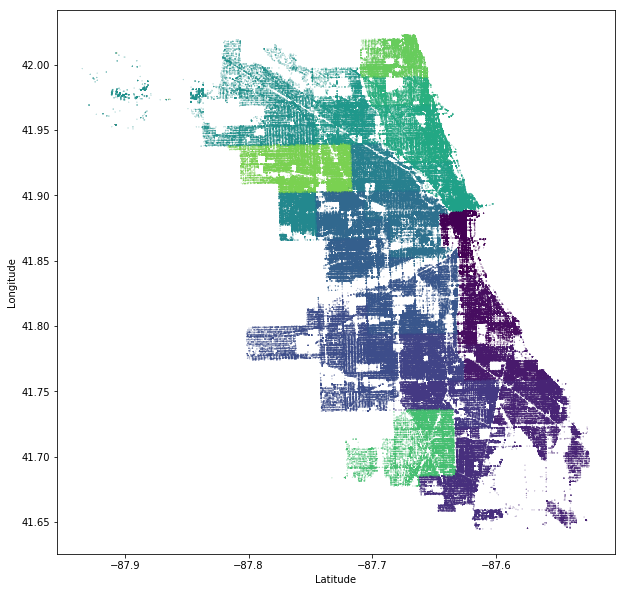

In [15]:
# Scatter plot of where observed crimes occur, colored by District
plt.figure(figsize=(10, 10))
plt.scatter(df_crime_unrounded['Longitude'], df_crime_unrounded['Latitude'],
            s=0.02, c=df_crime_unrounded['District'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

Next, we repeat the same plot of the latitude and longitude of each crime in Chicago, but colored by the Beat reported by the Chicago police department, showing the beat boundaries.

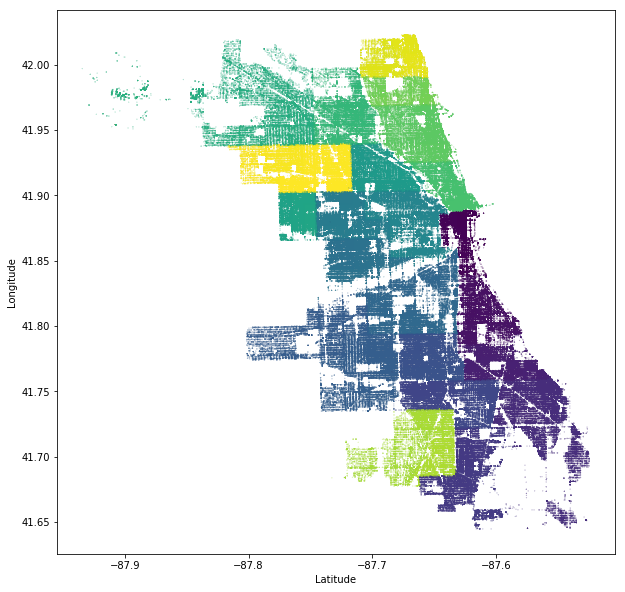

In [16]:
# Scatter plot of where observed crimes occur, colored by Beat
plt.figure(figsize=(10, 10))
plt.scatter(df_crime_unrounded['Longitude'], df_crime_unrounded['Latitude'],
            s=0.02, c=df_crime_unrounded['Beat'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

Next, we repeat the same plot of the latitude and longitude of each crime in Chicago, but colored by Chicago ward, showing the ward boundaries.

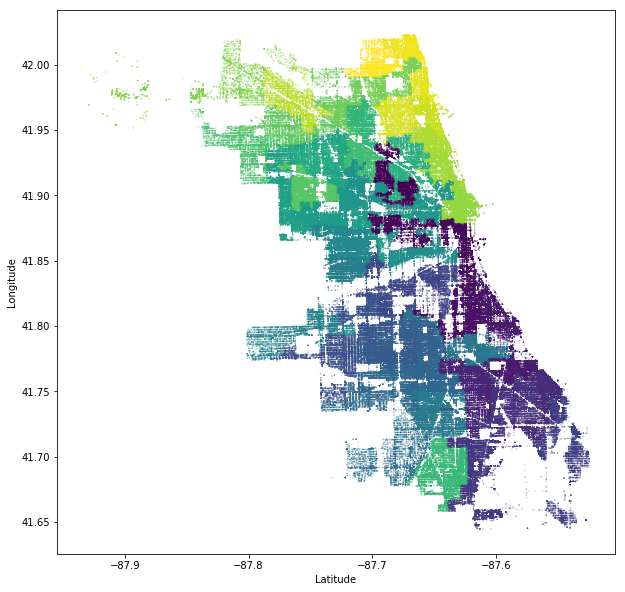

In [17]:
# Scatter plot of where observed crimes occur, colored by Ward
plt.figure(figsize=(10, 10))
plt.scatter(df_crime_unrounded['Longitude'], df_crime_unrounded['Latitude'],
            s=0.02, c=df_crime_unrounded['Ward'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

Next, we repeat the same plot of the latitude and longitude of each crime in Chicago, but colored by community area, showing the corresponding boundaries.

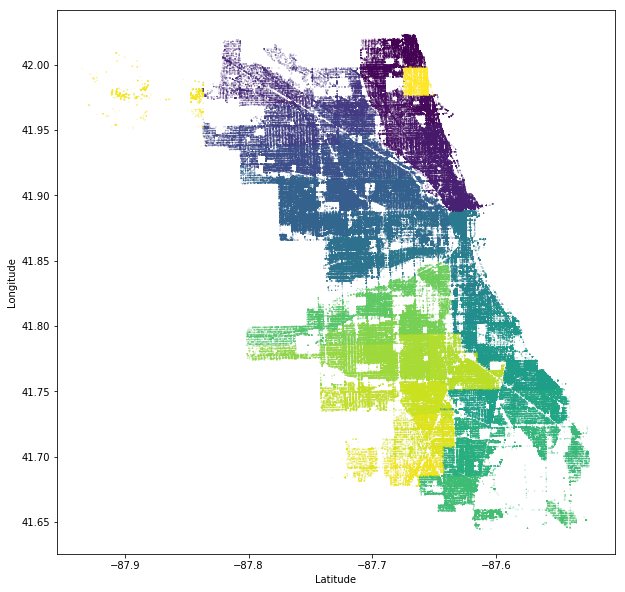

In [18]:
# Scatter plot of where observed crimes occur, colored by Community Area
plt.figure(figsize=(10, 10))
plt.scatter(df_crime_unrounded['Longitude'], df_crime_unrounded['Latitude'],
            s=0.02, c=df_crime_unrounded['Community Area'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

Next, we create visualizations of the Chicago Food Inspection data. In particular, we create bar graphs plotting the relative frequently of the most common values in various columns in the Food Inspection data. These bar graphs are below.

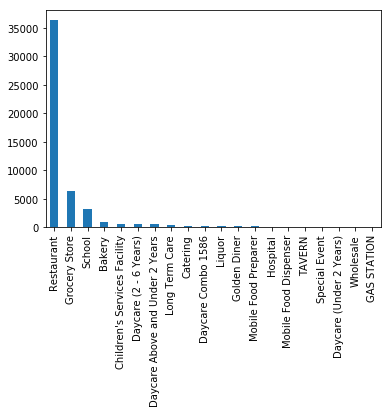

In [19]:
# Plot bar graph of restaurant facility types
df_food['Facility Type'].value_counts()[:20].plot(kind='bar')

# From this bar graph, we see that the vast majority of food inspections occur in
# restaurants, with grocery stores, schools, and bakeries being the next most
# common establishments to be inspected. After this, the inspection frequency for
# other types of restaurants drops off very quickly. So, it does not look like
# that the facility type will be very predictive of other statistics.

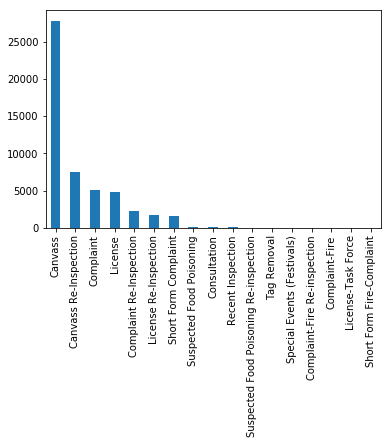

In [20]:
# Plot bar graph of food inspection types
df_food['Inspection Type'].value_counts().plot(kind='bar')

# From this bar graph, we see that the most common type of food inspection is Canvass
# and Canvass Re-Inspection. Canvass inspections are simply regular visits to
# restaurants by food inspectors to make sure the sanitary conditions meet the
# required codes. The next most common types of inspections are complaint and license
# inspections. It is not clear whether the types of inspections will correlate to
# other statistics in the crime or restaurant review datasets.

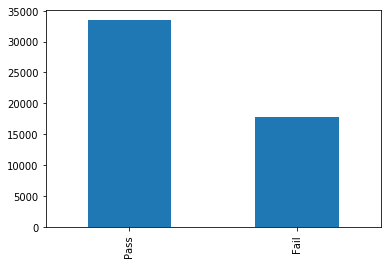

In [21]:
# Plot food inspection results
df_food['Results'].map({0: 'Fail', 1: 'Pass'}).value_counts().plot(kind='bar')

# This chart shows the count of the number of passed and failed inspections in Chicago.
# We see that there are approximately twice as many passed inspections as compared to
# failed inspections. Practically, this is slightly concerning, as this is a larger
# number of failed inspections than we would have expected.

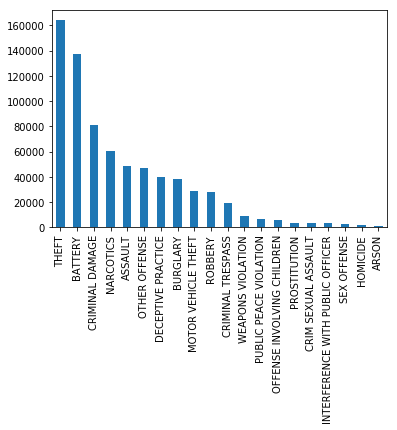

In [22]:
# Plot bar graph of the types of crime that occur in Chicago
df_crime['Primary Type'].value_counts()[:20].plot(kind='bar')

# This graph shows the relative frequency of each kind of crime in Chicago that
# is present in our dataset. We see that the relative frequency of crimes in
# Chicago roughly follows expected relative frequencies, but the particular
# observed frequencies could help inform future policing or law enforcement
# decisions.

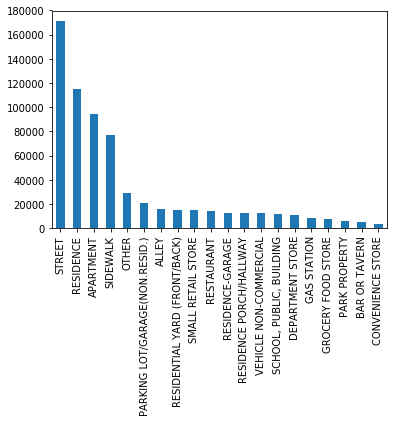

In [23]:
# Plot bar graph of Chicago crime location descriptions - to see where crimes tend to occur
df_crime['Location Description'].value_counts()[:20].plot(kind='bar')

# This bar graph plots the reported locations of where crimes in Chicago occur. We see that
# the relative frequencies of crime locations follow what we would expect, with a larger
# number of crimes occurring on streets or in homes.

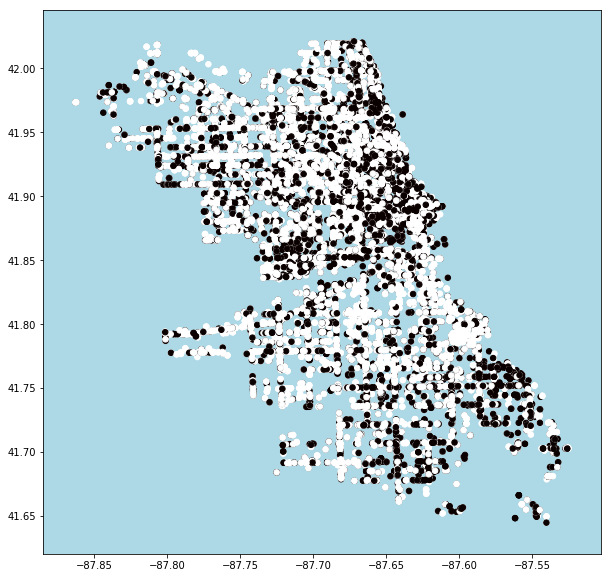

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(df_food_unrounded['Longitude'], df_food_unrounded['Latitude'], c=df_food_unrounded['Results'], s=30, cmap='hot')
axes = plt.gca()
axes.set_facecolor('lightblue')

# This graph plots the latitude and longitude of the specific rows in our Food Inspections
# dataset. These points are color coded by the food inspection result, and show the relative
# distributions of where successful and failed food inspections are located in the City of
# Chicago. From this, we can see that there are specific clusters of both failed and
# successful food inspections, which may or may not be correlated with crime occurrences.

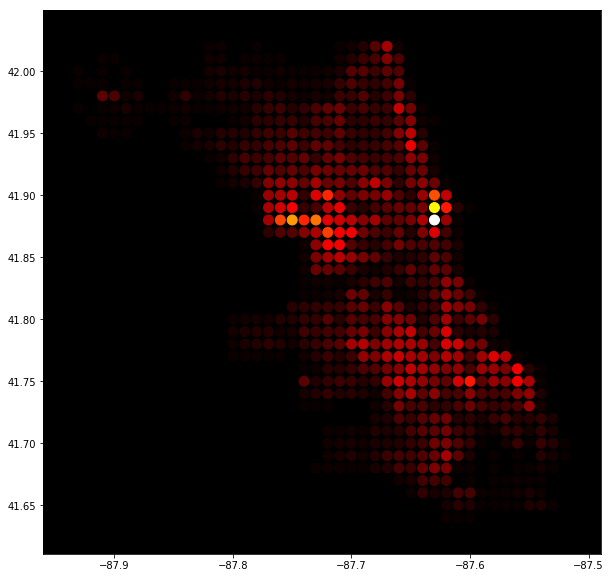

In [25]:
crime_counts = df_crime.groupby(['Latitude', 'Longitude']).count()['Location'].reset_index()
crime_counts['Count'] = crime_counts['Location']

plt.figure(figsize=(10, 10))
plt.scatter(crime_counts['Longitude'], crime_counts['Latitude'], c=crime_counts['Count'], s=100, cmap='hot')
axes = plt.gca()
axes.set_facecolor('black')

# In this graph, we plot a heat map corresponding to the number of crimes in the
# city of Chicago. In particular, we count the number of crimes in each neighborhood
# corresponding to a specific rounded latitude and longitude pair (to 2 decimal
# places). Brighter colors correspond to more crimes in a region. We see that the
# regions with the highest crime occurrences correspond to regions of the city with
# higher populations. It is not clear whether these crime counts will be correlated
# with other features in our dataset besides the neighborhood population.

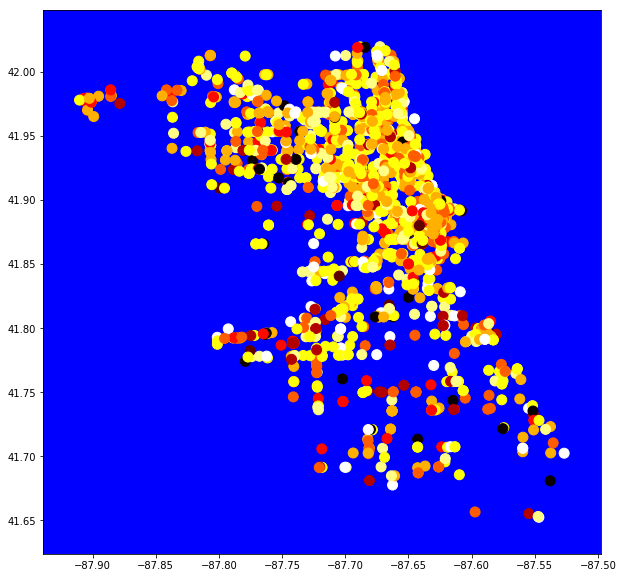

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(df_yelp_unrounded['Longitude'], df_yelp_unrounded['Latitude'], c=df_yelp['Rating'], s=100, cmap='hot')
axes = plt.gca()
axes.set_facecolor('blue')

# In this graph, we plot the locations of restaurants in Chicago, from the Yelp dataset.
# We observe that, as expected, there are more restaurants in the Yelp dataset in more
# populated areas. We also color each restaurant by its rating, where a darker color
# corresponds to a lower rating. Just by looking at the graph, it seems like there is a
# higher concentration of highly-rated restaurants close to the center of the city, but
# this could also be skewed due to the increased number of restaurants located
# closer to the city center.

## Data Analysis and Results

Refine facility types in food data and group by neighborhood

In [27]:
# Create a new table based on the food table with the following columns
# Neighborhood, OverallNum, OverallPassRate, RestaurantNum, RestaruantPassRate, GroceryNum, GroceryPassRate, SchoolNum, SchoolPassRate

df_food['Facility Type'] = df_food['Facility Type'].replace(
    {'MOBILE FROZEN DESSERT VENDOR': 'Restaurant',
     'Golden Diner': 'Restaurant', 
     'Bakery': 'Restaurant',
     'Daycare (2 - 6 Years)': 'Care Facility',
     'Daycare Above and Under 2 Years': 'Care Facility',
     'Children\'s Services Facility' : 'Care Facility',
     'RESTAURANT/GROCERY': 'Restaurant',
     'REST/GROCERY': 'Restaurant',
     'Rest/GYM' : 'Restaurant',
     'Long Term Care': 'Care Facility',
     'MOBILE DESSERTS VENDOR': 'Restaurant',
     'Liquor': 'Grocery Store',
     'Mobile Food Preparer': 'Restaurant',
     'CHILDERN\'S SERVICE FACILITY': 'Care Facility',
     'LIVE POULTRY': 'Grocery Store',
     'GROCERY/RESTAURANT': 'Restaurant',
     'Catering': 'Restaurant',
     'Daycare Combo 1586': 'Care Facility',
     'Mobile Food Dispenser': 'Restaurant'
    }
)

In [28]:
food_df = df_food[(df_food['Facility Type'] == 'Restaurant') | (df_food['Facility Type'] == 'Grocery Store') | (df_food['Facility Type'] == 'Care Facility')].copy()

food_counts = food_df.groupby(['Neighborhood']).count()['Results']
food_rates = food_df.groupby(['Neighborhood']).mean()['Results'].rename('PassRate')

Refine crime types and group by neighborhood

In [29]:
df_crime['Primary Type'] = df_crime['Primary Type'].replace(
    {'NARCOTICS': 'Drug',
     'OTHER NARCOTIC VIOLATION': 'Drug', 
     'BATTERY': 'Assault',
     'ASSAULT': 'Assault',
     'BURGLARY': 'Property Crime',
     'THEFT' : 'Property Crime',
     'MOTOR VEHICLE THEFT': 'Property Crime',
     'ARSON': 'Property Crime',
     'ROBBERY': 'Property Crime',
     'CRIMINAL TRESPASS' : 'Property Crime',
     'CRIMINAL DAMAGE': 'Property Crime',
     'CRIM SEXUAL ASSAULT': 'Sex Crimes',
     'PROSTITUTION': 'Sex Crimes',
     'PUBLIC INDECENCY': 'Sex Crimes',
     'HUMAN TRAFFICKING': 'Sex Crimes',
     'SEX OFFENSE': 'Sex Crimes',
     'OBSCENITY': 'Sex Crimes',
     'KIDNAPPING' : 'Horrible Other Crimes',
     'HOMICIDE': 'Horrible Other Crimes',
     'DECEPTIVE PRACTICE': 'Scam',
     'GAMBLING': 'Scam'
    }
)

In [30]:
crime_df = df_crime[(df_crime['Primary Type'] == 'Property Crime') |  (df_crime['Primary Type'] == 'Horrible Other Crimes') | (df_crime['Primary Type'] == 'Assault') | (df_crime['Primary Type'] == 'Drug') | (df_crime['Primary Type'] == 'Sex Crimes')].copy()

c_f = crime_df.groupby(['Neighborhood', 'Primary Type']).count()['Latitude'].to_frame()

Merge into one table with food, crime, census information

In [31]:
c_f.reset_index(level=0, inplace=True)
c_f['Primary Type'] = c_f.index
df_pivot = c_f.pivot(index='Neighborhood', columns='Primary Type', values='Latitude')

df_census['Total Population'] = df_census['Total Population'].astype(int)
df_census['Average Age'] = df_census['Average Age'].astype(float)
df_census['Average Household Size'] = df_census['Average Household Size'].astype(float)

df_counts = food_counts.groupby(['Neighborhood']).sum().rename('Establishments').to_frame()
df_big = pd.merge(df_counts.reset_index(), df_pivot.reset_index()).dropna()
df_big = pd.merge(df_big.reset_index(), food_rates.reset_index())
df_big = df_big.merge(df_census, how='left')

df_big.head()

,index,Neighborhood,Establishments,Assault,Drug,Horrible Other Crimes,Property Crime,Sex Crimes,PassRate,Total Population,Average Age,Average Household Size,Percent Housing Occupied
0,0,Albany Park,857,1723.0,296.0,17.0,3638.0,101.0,0.717620,51542.0,31.078026,3.08,90.768546
1,2,Archer Heights,236,565.0,116.0,9.0,1583.0,41.0,0.597458,13393.0,30.507134,3.48,90.447059
2,3,Armour Square,124,444.0,69.0,3.0,869.0,9.0,0.758065,13391.0,41.118083,2.55,91.157054
3,4,Ashburn,298,1563.0,307.0,33.0,3687.0,48.0,0.714765,41081.0,33.483019,3.25,95.336907
4,5,Auburn Gresham,429,6644.0,1657.0,67.0,10281.0,219.0,0.666667,48743.0,36.969525,2.76,86.496978


Normalize crime data to per capita

In [32]:
pop_dict, age_dict = {}, {}
first = True

for neigh in df_census['Neighborhood']:
    if not first:
        population  = list(df_census.loc[df_census['Neighborhood'] == neigh]['Total Population'])[0]
        age  = list(df_census.loc[df_census['Neighborhood'] == neigh]['Average Age'])[0]
        pop_dict[neigh] = int(population)
        age_dict[neigh] = age
        
    first = False
    
pop_dict['Garfield Park'] = pop_dict['Garfield Ridge']
pop_dict['Grand Crossing'] = pop_dict['Greater Grand Crossing']
pop_dict['Loop'] = pop_dict['The Loop']
pop_dict['Mckinley Park'] = pop_dict['McKinley Park']

def func(row, type_row_temp):
    try:
        return row[type_row_temp] / pop_dict[row['Neighborhood']]
    except:
        return 0 # DATA LOSS HERE!

from functools import partial
    
def normalize_field (typeCat):
    newFunc = partial(func, type_row_temp=typeCat)
    df_big[typeCat] = df_big.apply(newFunc, axis=1)

fields = ['Assault', 'Drug', 'Horrible Other Crimes', 'Property Crime', 'Sex Crimes']
    
for field in fields:
    normalize_field(field)

df_big['Total Crimes'] = df_big[fields].sum(axis=1)

df_big.head()

,index,Neighborhood,Establishments,Assault,Drug,Horrible Other Crimes,Property Crime,Sex Crimes,PassRate,Total Population,Average Age,Average Household Size,Percent Housing Occupied,Total Crimes
0,0,Albany Park,857,0.033429,0.005743,0.000330,0.070583,0.001960,0.717620,51542.0,31.078026,3.08,90.768546,0.112045
1,2,Archer Heights,236,0.042186,0.008661,0.000672,0.118196,0.003061,0.597458,13393.0,30.507134,3.48,90.447059,0.172777
2,3,Armour Square,124,0.033157,0.005153,0.000224,0.064894,0.000672,0.758065,13391.0,41.118083,2.55,91.157054,0.104100
3,4,Ashburn,298,0.038047,0.007473,0.000803,0.089750,0.001168,0.714765,41081.0,33.483019,3.25,95.336907,0.137241
4,5,Auburn Gresham,429,0.136307,0.033995,0.001375,0.210923,0.004493,0.666667,48743.0,36.969525,2.76,86.496978,0.387091


Add Yelp data to the big table

In [33]:
df_big = pd.merge(df_big.reset_index(), df_yelp.groupby(['Neighborhood']).mean()['Rating'].to_frame().reset_index())
del df_big['index']
del df_big['level_0']
df_big.head()

,Neighborhood,Establishments,Assault,Drug,Horrible Other Crimes,Property Crime,Sex Crimes,PassRate,Total Population,Average Age,Average Household Size,Percent Housing Occupied,Total Crimes,Rating
0,Albany Park,857,0.033429,0.005743,0.000330,0.070583,0.001960,0.717620,51542.0,31.078026,3.08,90.768546,0.112045,3.784091
1,Archer Heights,236,0.042186,0.008661,0.000672,0.118196,0.003061,0.597458,13393.0,30.507134,3.48,90.447059,0.172777,3.500000
2,Armour Square,124,0.033157,0.005153,0.000224,0.064894,0.000672,0.758065,13391.0,41.118083,2.55,91.157054,0.104100,4.444444
3,Ashburn,298,0.038047,0.007473,0.000803,0.089750,0.001168,0.714765,41081.0,33.483019,3.25,95.336907,0.137241,3.384615
4,Auburn Gresham,429,0.136307,0.033995,0.001375,0.210923,0.004493,0.666667,48743.0,36.969525,2.76,86.496978,0.387091,3.071429


Scatter matrix to analyze different trends between all the variables in the big table

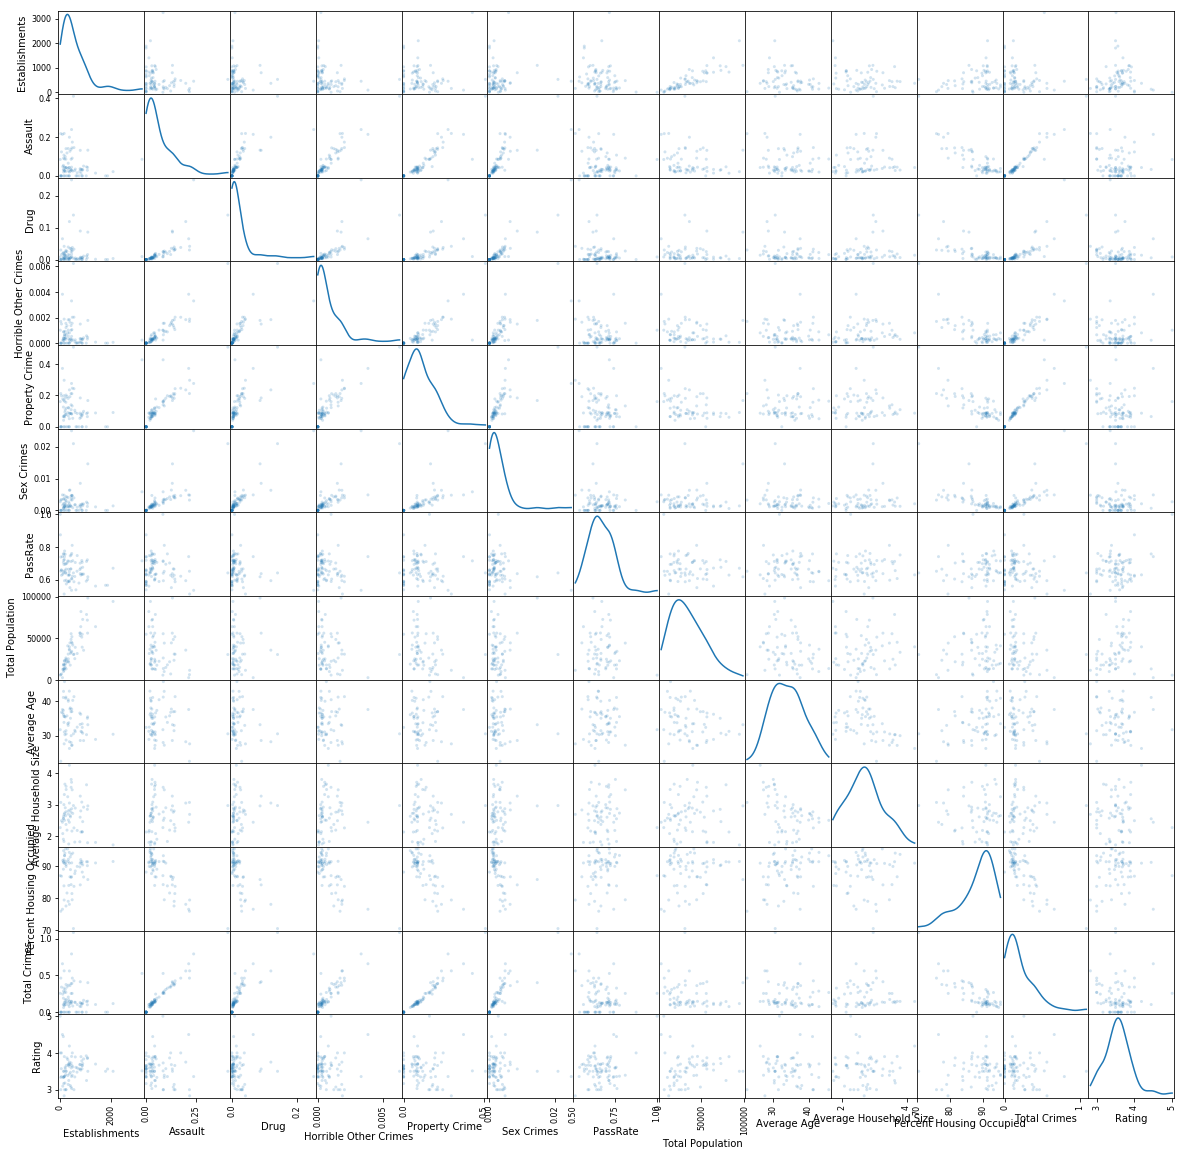

In [34]:
from pandas.plotting import scatter_matrix
x = scatter_matrix(df_big, alpha=0.2, figsize=(20, 20), diagonal='kde')

We run ordinary least squares linear regression to see whether there are any correlations between the data in our big table.

In [35]:
import statsmodels.formula.api as sm

df_big['y'] = df_big['Total Crimes']
df_big['x1'] = df_big['PassRate']
sm.ols(formula='y ~ x1', data=df_big).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.100
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.297
Time:                        19:24:41   Log-Likelihood:                 18.456
No. Observations:                  84   AIC:                            -32.91
Df Residuals:                      82   BIC:                            -28.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3897      0.188      2.071      0.042       0.015       0.764
x1            -0.2944      0.281     -1.049      0.297      -0.853       0.264
==============================================================================
Omnibus:                       40.138   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.178
Skew:                           1.677   Prob(JB):                     1.76e-22
Kurtosis:                       7.168   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df_big['x2'] = df_big['Rating']
sm.ols(formula='y ~ x2', data=df_big).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6061
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.438
Time:                        19:24:41   Log-Likelihood:                 18.206
No. Observations:                  84   AIC:                            -32.41
Df Residuals:                      82   BIC:                            -27.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3643      0.220      1.654      0.102      -0.074       0.803
x2            -0.0479      0.062     -0.779      0.438      -0.170       0.075
==============================================================================
Omnibus:                       43.336   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.527
Skew:                           1.800   Prob(JB):                     1.35e-25
Kurtosis:                       7.445   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df_big['x3'] = df_big['Establishments']
sm.ols(formula='y ~ x3', data=df_big).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.09647
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.757
Time:                        19:24:41   Log-Likelihood:                 17.946
No. Observations:                  84   AIC:                            -31.89
Df Residuals:                      82   BIC:                            -27.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2005      0.031      6.506      0.000       0.139       0.262
x3         -1.306e-05   4.21e-05     -0.311      0.757   -9.67e-05    7.06e-05
==============================================================================
Omnibus:                       43.022   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.151
Skew:                           1.794   Prob(JB):                     4.43e-25
Kurtosis:                       7.379   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
sm.ols(formula='y ~ x1 + x2 + x3', data=df_big).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5149
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.673
Time:                        19:24:41   Log-Likelihood:                 18.700
No. Observations:                  84   AIC:                            -29.40
Df Residuals:                      80   BIC:                            -19.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4949      0.261      1.899      0.061      -0.024       1.014
x1            -0.2831      0.303     -0.934      0.353      -0.887       0.320
x2            -0.0287      0.065     -0.440      0.661      -0.158       0.101
x3         -2.034e-05   4.33e-05     -0.470      0.640      -0.000    6.58e-05
==============================================================================
Omnibus:                       41.440   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.350
Skew:                           1.724   Prob(JB):                     8.06e-24
Kurtosis:                       7.301   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Count the crimes within a certain distance of each reviewed restaurant

In [39]:
del df_yelp_unrounded['Unnamed: 0']
del df_yelp_unrounded['Unnamed: 0.1']

df_yelp_unrounded['CloseCrimes'] = 0

def match(lat, long, threshold=0.01):
    lat_match = abs(df_crime_unrounded['Latitude'] - lat) <= threshold
    long_match = abs(df_crime_unrounded['Longitude'] - long) <= threshold
    return df_crime_unrounded[lat_match & long_match]

for index, row in df_yelp_unrounded.iterrows():
    df_yelp_unrounded.set_value(index, 'CloseCrimes', len(match(row['Latitude'], row['Longitude'], threshold=0.001)))

df_yelp_unrounded.head()

,Neighborhood,Latitude,Longitude,Rating,Review Count,CloseCrimes
0,Irving Park,41.953840,-87.719701,4.0,87,56
1,North Park,41.992238,-87.710209,2.5,3,55
2,Lincoln Park,41.926243,-87.672875,2.5,16,7
3,Rush & Division,41.896975,-87.625882,3.5,71,511
4,Clearing,41.776761,-87.761577,4.0,3,40


In [43]:
df_yelp_unrounded.groupby(['Rating']).min()['CloseCrimes']

Rating
1.0    2
1.5    8
2.0    0
2.5    0
3.0    0
3.5    0
4.0    0
4.5    0
5.0    0
Name: CloseCrimes, dtype: int64


In [44]:
df_yelp_unrounded.groupby(['Rating']).max()['CloseCrimes']

Rating
1.0     631
1.5     570
2.0    2336
2.5    2027
3.0    1912
3.5    2336
4.0    2646
4.5    2637
5.0    1270
Name: CloseCrimes, dtype: int64

In [47]:
df_yelp_unrounded.groupby(['Rating']).mean()['CloseCrimes'].round(1)

Rating
1.0     98.9
1.5    175.5
2.0    173.8
2.5    156.0
3.0    160.4
3.5    181.8
4.0    143.9
4.5    148.6
5.0    115.1
Name: CloseCrimes, dtype: float64

In [49]:
df_yelp_unrounded.groupby(['Rating']).std()['CloseCrimes'].round(1)

Rating
1.0    117.9
1.5    160.4
2.0    286.6
2.5    205.0
3.0    177.1
3.5    225.8
4.0    208.2
4.5    283.9
5.0    161.6
Name: CloseCrimes, dtype: float64

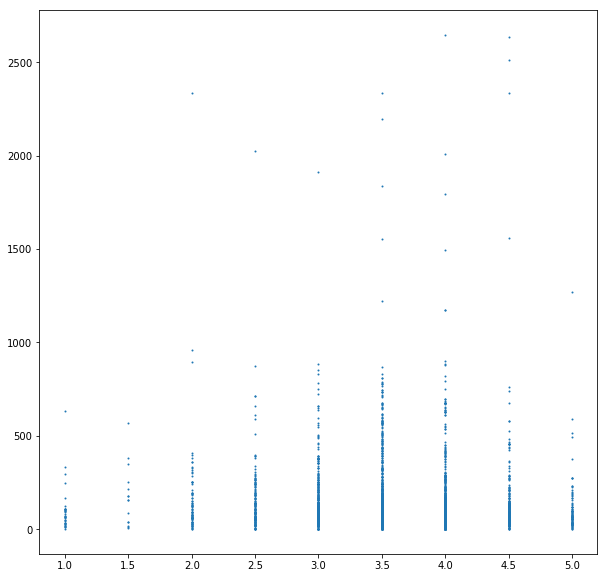

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(df_yelp_unrounded['Rating'], df_yelp_unrounded['CloseCrimes'], s=1, cmap='hot')

Analyze the number of crimes occurring over time

In [51]:
from dateutil import parser as dateparser
df_crime['DateTime'] = df_crime['Date'].apply(dateparser.parse).apply(lambda t: t.date())

df_time = df_crime.groupby(['DateTime']).count()['Location'].rename('TotalCrimes').reset_index()
df_time.head()

,DateTime,TotalCrimes
0,2014-01-01,954
1,2014-01-02,475
2,2014-01-03,553
3,2014-01-04,570
4,2014-01-05,402


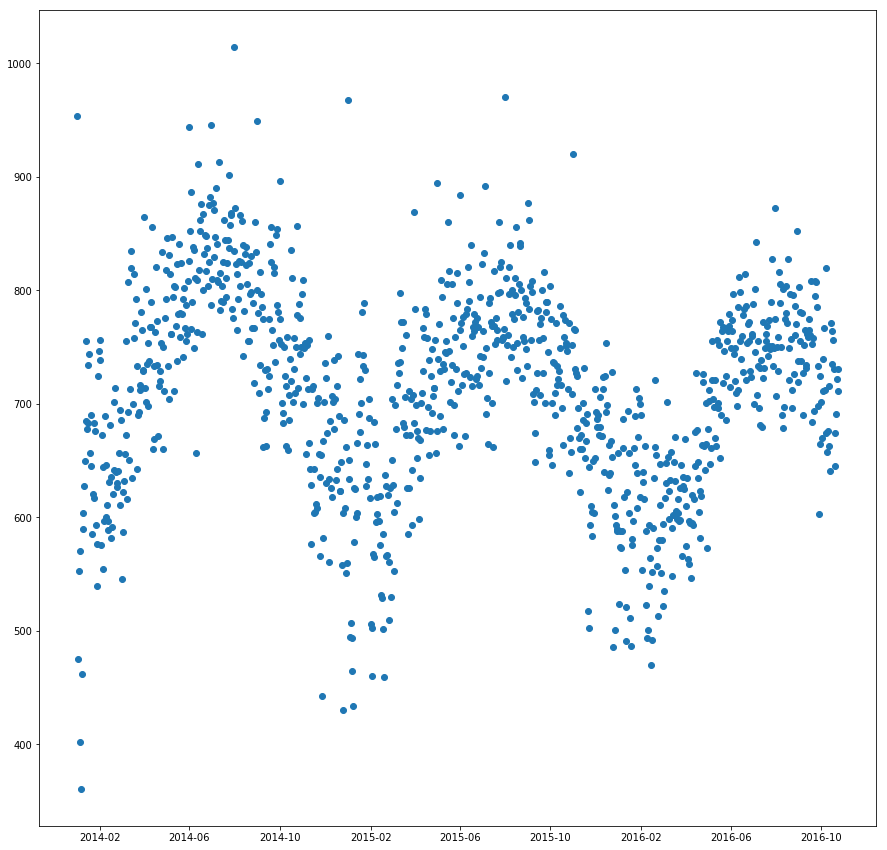

In [52]:
plt.figure(figsize=(15, 15))
plt.plot_date(df_time['DateTime'], df_time['TotalCrimes'])

This indicates the seasonality of crimes per day which is consistent year-over-year. Now perform sinusoidal regression.

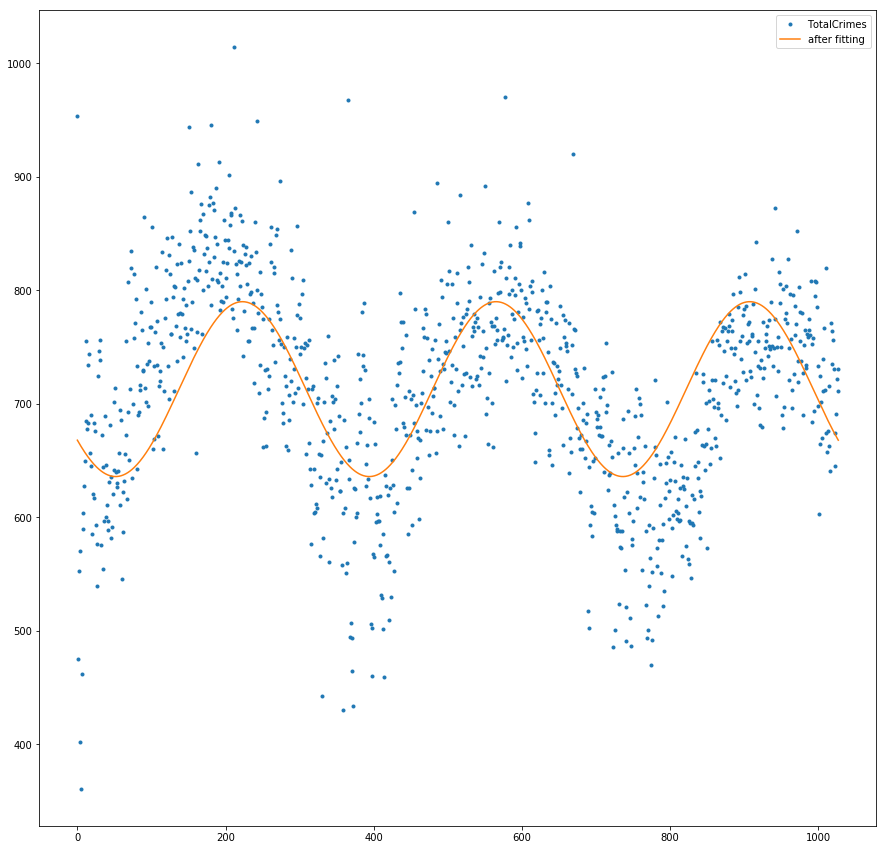

In [53]:
from scipy.optimize import leastsq

t = np.linspace(0, 6*np.pi, len(df_time))

guess_mean = df_time['TotalCrimes'].mean()
guess_std = 3*(df_time['TotalCrimes'].std())/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - df_time['TotalCrimes']
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_std*np.sin(t+est_phase) + est_mean

plt.figure(figsize=(15, 15))
plt.plot(df_time.index, df_time['TotalCrimes'], '.')
plt.plot(data_fit, label='after fitting')
plt.legend()
plt.show()

## Conclusions / Discussion

Overall, when trying to answer our initial question about whether or not there is a correlation between restaurant health and crime, we did not find a conclusive correlation between these two factors. As we were working on this project, we hypothesized that the food health data might not be sufficient, in finding correlations, since restaurants could either pass or fail, and the metrics that go into determining a risk level seemed ambiguous, despite the evaluation criteria provided. Ultimately, in addition to the restaurant health data set, we decided to include the Yelp review data set, providing another metric for us to evaluate a correlation between “restaurant quality” and crime. 
 
From a visual perspective, if we take a look at our scatter matrix, aside from the crime to crime correlations, there are no visible correlations in the matrix. The crime to crime correlations are obvious correlations, since, as we expect, crime of different types tend to all increase in frequency, in a bad neighborhood. One interesting correlation that we did find is that assault is correlated to percent housing occupied. Although this does not specifically answer our question, it was an interesting find. Our initial hypothesis was that food quality would be correlated to crime, but from a broader perspective, food quality is a representation of a community’s overall quality of life. In this particular case, in communities with more assault, there are fewer homes occupied. At face value, fewer homes occupied translates to a less desirable neighborhood, and as the study (https://www.smartgrowthamerica.org/app/legacy/documents/true-costs.pdf) shows, unoccupied homes have a net negative effect on a community. Therefore, broadly, there is a correlation between assault and the quality of life within a community. 
 
For each of the regressions that we ran on the df_big data, we noticed that the R^2 value was 0 or very close to it, and the P > |t| values were relatively large and certainly greater than any conventional significance level. Plainly, the correlations are not meaningful in two different senses. The low R^2 value can be understood as stating that the regression based on each predictive factor (restaurant pass rate, average restaurant rating, number of restaurants) does not successfully account for any of the variation in the crime data. Meanwhile, the high p values can be interpreted as meaning that any correlation that does occur between the variables of interest is no more significant than the random variation that would have occurred by chance alone. Taken together, it is obvious that our hypotheses were false and that the predictive power we believed would exist simply doesn’t manifest in the real world data.
 
In another scatter plot, we did notice an interesting trend between the crime level of the area 0.001 latitudes / longitudes around a restaurant, and a restaurant’s rating. In other words, we noticed an interesting trend between the crime level surrounding a restaurant (100 m radius approximately) and a restaurant’s rating. When visually analyzing this information, we noticed that there seemed to be no 1 or 1.5 star Yelp restaurants with more than 1000 crimes that have occurred within its vicinity. This was odd, since for every other review value, there were some restaurants that had the review number, but had more than a 1000 crimes in the nearby vicinity. This was an unexpected trend, although it is important to note, that this is a visual analysis, and for all review values, restaurants with above 1000 crimes in the vicinity were outliers. Moreover, there is a bias, given the nature of Yelp reviews, since according to data released by Yelp, as described in this article from the nws website Venture Beat (http://bit.ly/2rfVVu8) , the average Yelp review is 3.8 stars. Although standard deviation data was not released, it is likely that that the low star value restaurants are more likely to go out of business, just because of their bad nature. Therefore, this is another possible bias that we must take into consideration.  When looking at numeric values associated with the data above, interestingly, there are no 1.5 or 1 star restaurants with no crime around it, while for every other rating value, there is a crime. This loose correlation is in line with our hypothesis, but when looking at the mean, we see that 1 star restaurants, on average, have fewer crimes, when compared to restaurants of every other rating.
 
By plotting the number of crimes per day over time (for each day in the three years) and implementing a sinusoidal regression, we were able to identify a clear seasonal trend in the criminality of the city. We observed that the crimes tend to peak every year in the summer season. Although this does not directly answer any of the questions associated with our hypothesis, it is an interesting analysis that we can base future questions off of. Since, as described here (http://bit.ly/2smxTRC) , the weather in Chicago tends to be far lower in the winter, as opposed to the summer, one possible hypothesis is that people tend to not go out as much during the winter. Based on this assumption, we would expect that foot traffic to restaurants would also drop. This seasonal variation in crime could be used to, in conjunction with data on restuarant activity, identify variations in the types of crimes that occur, based on season, allowing us to possibly determine the crimes that might impact the quality of a restaurant, making our analysis deeper. 
 
With regards to future analyses, we converted the times in our dataset to just dates, to count the number of total crimes that occur per day. In doing so, we were able to plot the number of crimes that occur in the City of Chicago per day, which returned an interesting result. We observed that the number of crimes occurring in Chicago per day is highly correlated with the time of the year. For example, we see that there are many more crimes that occur in Chicago during the summer months as compared to the winter months. Intuitively, this makes sense due to the widely varying weather observed in Chicago during the summer and winter months. It would be interesting to see more fine grained relationships between individual types of crimes and the time of year, in addition to doing additional temporal analysis. For example, do certain types of crimes occur more frequently during certain times of day or days of the week? Or, are restaurant reviews or food inspection results dependent on certain temporal features? 